# Exploring Dandiset 000945: Neural Spiking Data in the Awake Rat Somatosensory Cortex Responding to Trials of Transcranial Focused Ultrasound Stimulation

This notebook was AI-generated using dandi-notebook-gen and has not been fully verified.
Use caution when interpreting the code or results.

## Overview of Dandiset 000945

This Dandiset contains neural spiking data recorded from the somatosensory cortex of awake rats during transcranial focused ultrasound stimulation (tFUS) trials.
Researchers tested different pulse repetition frequencies (PRFs) of ultrasound stimulation using a 128-element random array ultrasound transducer.
Chronic electrophysiological recordings were acquired using 32-channel NeuroNexus electrodes.
Ultrasound stimulation was delivered every 2.5 seconds with a 10% jitter, and each recording has 500 trials.
The PRFs tested were 30 Hz, 300 Hz, 1500 Hz, 3000 Hz, and 4500 Hz, each with a 200 microsecond pulse duration and a 67 ms ultrasound duration.
Some recordings were performed under 2% isoflurane anesthesia for comparison.

All 10 subjects were male rats, implanted with their chronic electrode at 6 months of age and then recordings taken first at 8-10 months, and then some repeats taken at 12 months.
Within each subject's folder are recordings for the different PRFs.
Most subjects have 5 recordings within, one for each PRF.
Some subjects have duplicate recordings taken a few months after the original ones.
A few recordings were not included due to excessive noise in the recordings.
Files are named in the format SubjectName_PRF_PulseDuration.
Each file contains spike time data with the cell type labels included for each neurons, as well as time series data for the onset of each trial of ultrasound stimulation.

## What this notebook will cover

This notebook will demonstrate how to:
1. Load the Dandiset using the DANDI API.
2. Access and explore the available assets (NWB files).
3. Load metadata from a selected NWB file.
4. Load and visualize electrophysiology data (spike times and cell type labels).
5. Load and visualize trial information.

## Required Packages

The following packages are required to run this notebook:
- pynwb
- h5py
- remfile
- matplotlib
- numpy
- pandas
- seaborn
- dandi

## Load Dandiset using the DANDI API


In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000945")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 75 assets in the dataset
\nFirst 5 assets:
- sub-BH498/sub-BH498_ses-20240306T124227_ecephys.nwb
- sub-BH498/sub-BH498_ses-20240305T200606_ecephys.nwb
- sub-BH498/sub-BH498_ses-20240305T191833_ecephys.nwb
- sub-BH498/sub-BH498_ses-20230906T180913_ecephys.nwb
- sub-BH498/sub-BH498_ses-20240305T204552_ecephys.nwb


## Load Metadata and Data from an NWB File

We will now load the metadata and some example data from one of the NWB files in the Dandiset to demonstrate how to access the data. We will use the first NWB file in the assets list: `sub-BH497/sub-BH497_ses-20240310T143729_ecephys.nwb`.

**Note:** This NWB file is stored remotely, so we will use `remfile` to stream the data.

In [2]:
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/a4e04662-e4cb-49f3-9076-41e04e833a11/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

nwb # (NWBFile)

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


root pynwb.file.NWBFile at 0x140405737537296
Fields:
  devices: {
    array <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    shank1 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  file_create_date: [datetime.datetime(2024, 3, 29, 23, 25, 55, tzinfo=tzoffset(None, -14400))
 datetime.datetime(2024, 3, 29, 23, 25, 55, 259000, tzinfo=tzoffset(None, -14400))]
  identifier: BH498_3000_200_anes
  institution: Carnegie Mellon University
  intervals: {
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  session_description: Awake S1 Stimulation by tFUS
  session_start_time: 2024-03-10 14:37:29-04:00
  subject: subject pynwb.file.Subject at 0x140405737694096
Fields:
  age: P24W
  description: HSD:WI rat
  sex: M
  species: Rattus norvegicus
  subject_id: BH497

  timestamps_reference_time: 2024-03-10 14:37:29-04:00
  trials: trials <class 'pynwb.epoch.TimeIntervals'>
  units: units <class 'pynwb.misc.Units'>

Show some basic information about the NWB file:

In [3]:
nwb.session_description # (str) Awake S1 Stimulation by tFUS

'Awake S1 Stimulation by tFUS'

In [4]:
nwb.identifier # (str) BH498_3000_200_anes

'BH498_3000_200_anes'

In [5]:
nwb.session_start_time # (datetime) 2024-03-10T14:37:29-04:00

datetime.datetime(2024, 3, 10, 14, 37, 29, tzinfo=tzoffset(None, -14400))

In [6]:
nwb.timestamps_reference_time # (datetime) 2024-03-10T14:37:29-04:00

datetime.datetime(2024, 3, 10, 14, 37, 29, tzinfo=tzoffset(None, -14400))

## Explore Electrode Groups

In [7]:
nwb.electrode_groups # (LabelledDict)

{'shank1': shank1 pynwb.ecephys.ElectrodeGroup at 0x140405737699472
 Fields:
   description: electrode group for shank1
   device: array pynwb.device.Device at 0x140405737690128
 Fields:
   description: A1x32-Poly3-10mm-50-177-Z32
   manufacturer: Neuronexus
 
   location: brain area}

In [8]:
nwb.electrode_groups["shank1"] # (ElectrodeGroup)

shank1 pynwb.ecephys.ElectrodeGroup at 0x140405737699472
Fields:
  description: electrode group for shank1
  device: array pynwb.device.Device at 0x140405737690128
Fields:
  description: A1x32-Poly3-10mm-50-177-Z32
  manufacturer: Neuronexus

  location: brain area

In [9]:
nwb.electrode_groups["shank1"].description # (str) electrode group for shank1

'electrode group for shank1'

In [10]:
nwb.electrode_groups["shank1"].location # (str) brain area

'brain area'

In [11]:
nwb.electrode_groups["shank1"].device # (Device)

array pynwb.device.Device at 0x140405737690128
Fields:
  description: A1x32-Poly3-10mm-50-177-Z32
  manufacturer: Neuronexus

In [12]:
nwb.electrode_groups["shank1"].device.description # (str) A1x32-Poly3-10mm-50-177-Z32

'A1x32-Poly3-10mm-50-177-Z32'

In [13]:
nwb.electrode_groups["shank1"].device.manufacturer # (str) Neuronexus

'Neuronexus'

## Explore Devices

In [14]:
nwb.devices # (LabelledDict)

{'array': array pynwb.device.Device at 0x140405737690128
 Fields:
   description: A1x32-Poly3-10mm-50-177-Z32
   manufacturer: Neuronexus}

In [15]:
nwb.devices["array"] # (Device)

array pynwb.device.Device at 0x140405737690128
Fields:
  description: A1x32-Poly3-10mm-50-177-Z32
  manufacturer: Neuronexus

In [16]:
nwb.devices["array"].description # (str) A1x32-Poly3-10mm-50-177-Z32

'A1x32-Poly3-10mm-50-177-Z32'

In [17]:
nwb.devices["array"].manufacturer # (str) Neuronexus

'Neuronexus'

## Explore Trials

In [18]:
nwb.intervals # (LabelledDict)

{'trials': trials pynwb.epoch.TimeIntervals at 0x140405737735824
 Fields:
   colnames: ['start_time' 'stop_time']
   columns: (
     start_time <class 'hdmf.common.table.VectorData'>,
     stop_time <class 'hdmf.common.table.VectorData'>
   )
   description: tFUS stimulation trial onset and offset
   id: id <class 'hdmf.common.table.ElementIdentifiers'>}

In [19]:
nwb.intervals["trials"] # (TimeIntervals)

,start_time,stop_time
id,,
1,0.408248,2.608248
2,3.050619,5.250619
3,5.559296,7.759296
4,8.108483,10.308483


Convert to a pandas DataFrame with 500 rows and 2 columns

In [20]:
nwb.trials.to_dataframe() # (DataFrame)

,start_time,stop_time
id,,
1,0.408248,2.608248
2,3.050619,5.250619
3,5.559296,7.759296
4,8.108483,10.308483
5,10.392863,12.592863
...,...,...
496,1237.517148,1239.717148
497,1240.100045,1242.300045
498,1242.693468,1244.893468


Show the first few rows of the pandas DataFrame

In [21]:
nwb.trials.to_dataframe().head() # (DataFrame)

,start_time,stop_time
id,,
1,0.408248,2.608248
2,3.050619,5.250619
3,5.559296,7.759296
4,8.108483,10.308483
5,10.392863,12.592863


In [22]:
nwb.trials.description # (str) tFUS stimulation trial onset and offset

'tFUS stimulation trial onset and offset'

In [23]:
nwb.trials.colnames # (tuple) ['start_time', 'stop_time']

('start_time', 'stop_time')

## Explore Electrodes

In [24]:
nwb.electrodes # (DynamicTable)

,x,y,z,imp,location,filtering,group,group_name
id,,,,,,,,
0,1.0,10.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x140405737699472\nFields:\n description: electrode group for shank1\n device: array pynwb.device.Device at 0x140405737690128\nFields:\n description: A1x32-Poly3-10mm-50-177-Z32\n manufacturer: Neuronexus\n\n location: brain area\n,shank1elec1
1,1.0,11.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x140405737699472\nFields:\n description: electrode group for shank1\n device: array pynwb.device.Device at 0x140405737690128\nFields:\n description: A1x32-Poly3-10mm-50-177-Z32\n manufacturer: Neuronexus\n\n location: brain area\n,shank1elec2
2,1.0,9.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x140405737699472\nFields:\n description: electrode group for shank1\n device: array pynwb.device.Device at 0x140405737690128\nFields:\n description: A1x32-Poly3-10mm-50-177-Z32\n manufacturer: Neuronexus\n\n location: brain area\n,shank1elec3
3,1.0,8.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x140405737699472\nFields:\n description: electrode group for shank1\n device: array pynwb.device.Device at 0x140405737690128\nFields:\n description: A1x32-Poly3-10mm-50-177-Z32\n manufacturer: Neuronexus\n\n location: brain area\n,shank1elec4


Convert to a pandas DataFrame with 32 rows and 8 columns

In [25]:
nwb.electrodes.to_dataframe() # (DataFrame)

,x,y,z,imp,location,filtering,group,group_name
id,,,,,,,,
0,1.0,10.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x14040...,shank1elec1
1,1.0,11.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x14040...,shank1elec2
2,1.0,9.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x14040...,shank1elec3
3,1.0,8.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x14040...,shank1elec4
4,1.0,7.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x14040...,shank1elec5
5,1.0,6.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x14040...,shank1elec6
6,1.0,5.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x14040...,shank1elec7
7,1.0,4.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x14040...,shank1elec8
8,1.0,3.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x14040...,shank1elec9


Show the first few rows of the pandas DataFrame

In [26]:
nwb.electrodes.to_dataframe().head() # (DataFrame)

,x,y,z,imp,location,filtering,group,group_name
id,,,,,,,,
0,1.0,10.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x14040...,shank1elec1
1,1.0,11.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x14040...,shank1elec2
2,1.0,9.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x14040...,shank1elec3
3,1.0,8.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x14040...,shank1elec4
4,1.0,7.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x14040...,shank1elec5


In [27]:
nwb.electrodes.description # (str) all electrodes

'all electrodes'

In [28]:
nwb.electrodes.colnames # (tuple) ['x', 'y', 'z', 'imp', 'location', 'filtering', 'group', 'group_name']

('x', 'y', 'z', 'imp', 'location', 'filtering', 'group', 'group_name')

## Explore Subject

In [29]:
nwb.subject # (Subject)

subject pynwb.file.Subject at 0x140405737694096
Fields:
  age: P24W
  description: HSD:WI rat
  sex: M
  species: Rattus norvegicus
  subject_id: BH497

In [30]:
nwb.subject.age # (str) P24W

'P24W'

In [31]:
nwb.subject.description # (str) HSD:WI rat

'HSD:WI rat'

In [32]:
nwb.subject.sex # (str) M

'M'

In [33]:
nwb.subject.species # (str) Rattus norvegicus

'Rattus norvegicus'

In [34]:
nwb.subject.subject_id # (str) BH497

'BH497'

## Explore Units

In [35]:
nwb.units # (Units)

,spike_times,celltype_label
id,,
0,"[0.07421952, 0.1521664, 0.1650688, 0.21364736, 0.33599488, 0.40730624, 0.59469824, 0.6424576, 0.7450624, 0.82542592, 0.8648704, 0.94691328, 1.0082304, 1.29581056, 1.39481088, 1.4733312, 1.606656, 1.77954816, 1.8624512, 1.93368064, 2.02940416, 2.15887872, 2.30670336, 2.34819584, 2.38338048, 2.46038528, 2.54189568, 2.55926272, 2.76545536, 2.7717632, 2.8727296, 3.11599104, 3.18042112, 3.28708096, 3.3206272, 3.50789632, 3.55741696, 3.61783296, 3.66657536, 3.74050816, 3.94309632, 4.05766144, 4.10185728, 4.2252288, 4.48835584, 4.5162496, 4.56962048, 4.6739456, 4.8252928, 5.05606144, 5.28162816, 5.30563072, 5.3415936, 5.35437312, 5.41200384, 5.56068864, 5.59853568, 5.63003392, 5.68864768, 5.78408448, 5.99498752, 6.0741632, 6.10430976, 6.18704896, 6.20232704, 6.28789248, 6.64035328, 6.65030656, 6.73927168, 6.83593728, 6.89700864, 6.93133312, 7.16263424, 7.25385216, 7.30472448, 7.54036736, 7.68741376, 7.8227456, 7.87017728, 8.00903168, 8.09467904, 8.12638208, 8.14055424, 8.23549952, 8.28162048, 8.29018112, 8.2919424, 8.33998848, 8.45594624, 8.51185664, 8.60827648, 8.68122624, 8.7713792, 8.77309952, 9.07882496, 9.12007168, 9.22816512, 9.23004928, 9.2659712, 9.37488384, ...]",2.0
1,"[0.11517952, 0.16883712, 0.24428544, 0.25112576, 0.4612096, 0.47529984, 0.58744832, 0.74883072, 0.81895424, 0.95809536, 1.05537536, 1.07937792, 1.2343296, 1.32091904, 1.3631488, 1.48668416, 1.52920064, 1.83078912, 1.92454656, 1.9470336, 2.011136, 2.01834496, 2.03157504, 2.05254656, 2.05553664, 2.07081472, 2.14409216, 2.26787328, 2.28962304, 2.36343296, 2.38063616, 2.55361024, 2.7031552, 2.80317952, 2.82202112, 2.86633984, 3.0707712, 3.272704, 3.2950272, 3.41495808, 3.49069312, 3.5907584, 3.59931904, 3.64486656, 3.68812032, 3.77593856, 3.88640768, 3.96324864, 4.1033728, 4.15137792, 4.17042432, 4.22064128, 4.32914432, 4.38923264, 4.41335808, 4.69655552, 4.727808, 4.7423488, 4.77032448, 4.85593088, 5.03148544, 5.29702912, 5.36784896, 5.3966848, 5.42810112, 5.51784448, 5.57232128, 5.64690944, 5.75705088, 5.81296128, 5.86432512, 5.90839808, 6.05356032, 6.05802496, 6.10582528, 6.29264384, 6.68258304, 6.75557376, 6.7923968, 6.83839488, 6.87624192, 7.03488, 7.07948544, 7.14121216, 7.22591744, 7.39168256, 7.40098048, 7.41343232, 7.42055936, 7.46098688, 7.47741184, 7.66836736, 7.86477056, 8.04564992, 8.04999168, 8.13056, 8.1352704, 8.16693248, 8.1758208, 8.2450432, ...]",1.0
2,"[0.02265088, 0.06856704, 0.21602304, 0.32260096, 0.35500032, 0.479232, 0.61792256, 0.63787008, 0.65888256, 0.67940352, 0.75943936, 0.8757248, 0.974848, 0.99221504, 1.0082304, 1.4184448, 1.48680704, 1.6226304, 1.6879616, 1.86261504, 1.87604992, 1.89681664, 2.15891968, 2.16080384, 2.23285248, 2.26983936, 2.4031232, 2.69266944, 2.70323712, 2.85999104, 3.0763008, 3.09878784, 3.3222656, 3.33778944, 3.36740352, 3.38366464, 3.40709376, 3.51780864, 3.69266688, 3.8223872, 4.1822208, 4.32705536, 4.34720768, 4.37743616, 4.51149824, 4.56032256, 4.60009472, 4.7110144, 4.73714688, 4.77282304, 4.80579584, 4.81275904, 4.85085184, 4.9938432, 5.00473856, 5.1083264, 5.12909312, 5.17050368, 5.199872, 5.36690688, 5.46254848, 5.59939584, 5.83634944, 5.99883776, 6.11393536, 6.12478976, 6.22043136, 6.38976, 6.4149504, 6.72206848, 6.73849344, 6.81955328, 6.84650496, 7.19888384, 7.33679616, 7.37562624, 7.74791168, 7.84044032, 8.05060608, 8.33339392, 8.97323008, 9.08050432, 9.16701184, 9.41293568, 9.59873024, 9.62670592, 9.66889472, 9.86083328, 10.22754816, 10.5115648, 10.51766784, 10.53323264, 10.75380224, 10.7995136, 10.9295616, 11.23147776, 11.37590272, 11.42427648, 11.49345792, 11.4972672, ...]",2.0
3,"[0.11517952, 0.11943936, 0.86482944, 0.9811968, 1.0246144, 1.0493952, 1.26316544, 1.6058368, 1.94359296, 2.10661376, 2.22027776, 2.2562816, 2.3066624, 2.4713216, 2.56712704, 2.57798144, 2.5894912, 2.63016448, 2.73567744, 2.78196224, 3.03017984, 3.24292608, 3.26721536, 3.385344, 3.48008448, 3.58354944, 3.59698432, 3.7115904, 3.79441152, 3.96353536, 4.1179136, 4.12332032, 4.21400576, 4.

Convert to a pandas DataFrame

In [36]:
nwb.units.to_dataframe()

,spike_times,celltype_label
id,,
0,"[0.07421952, 0.1521664, 0.1650688, 0.21364736,...",2.0
1,"[0.11517952, 0.16883712, 0.24428544, 0.2511257...",1.0
2,"[0.02265088, 0.06856704, 0.21602304, 0.3226009...",2.0
3,"[0.11517952, 0.11943936, 0.86482944, 0.9811968...",1.0
4,"[0.04317184, 0.16596992, 0.58380288, 0.6155878...",2.0
...,...,...
59,"[0.0729088, 0.32329728, 0.35483648, 0.53952512...",1.0
60,"[0.04583424, 0.35938304, 0.3864576, 0.40267776...",2.0
61,"[0.006144, 0.28430336, 0.48566272, 0.51789824,...",1.0


Show the first few rows of the pandas DataFrame

In [37]:
nwb.units.to_dataframe().head()

,spike_times,celltype_label
id,,
0,"[0.07421952, 0.1521664, 0.1650688, 0.21364736,...",2.0
1,"[0.11517952, 0.16883712, 0.24428544, 0.2511257...",1.0
2,"[0.02265088, 0.06856704, 0.21602304, 0.3226009...",2.0
3,"[0.11517952, 0.11943936, 0.86482944, 0.9811968...",1.0
4,"[0.04317184, 0.16596992, 0.58380288, 0.6155878...",2.0


In [38]:
nwb.units.description # (str) units table

'units table'

In [39]:
nwb.units.colnames # (tuple) ['spike_times', 'celltype_label']

('spike_times', 'celltype_label')

In [40]:
nwb.units.waveform_unit # (str) volts

'volts'

## Load and Visualize Spike Times

Here, we will load the spike times and cell type labels from the `units` table and plot the spike times for each cell type.

**Note:** We are only loading the first 10 units to avoid loading too much data.

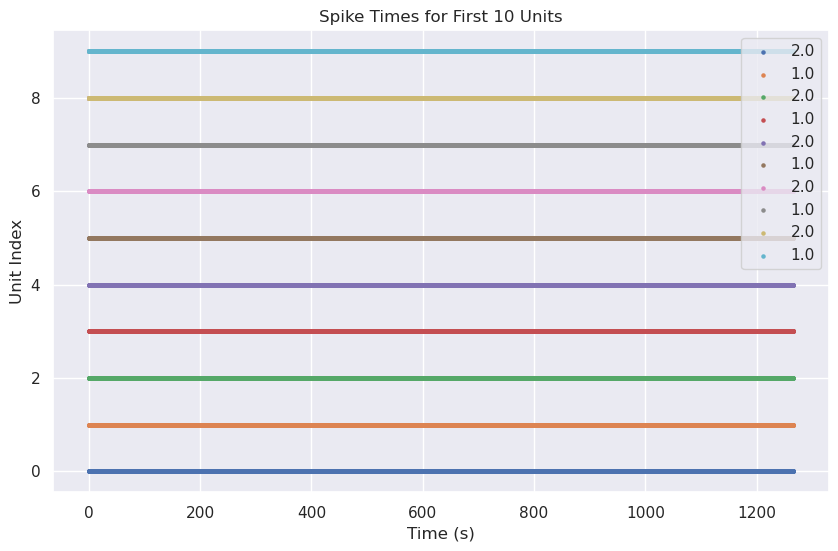

In [41]:
units_df = nwb.units.to_dataframe().head(10)
spike_times = units_df['spike_times']
celltype_labels = units_df['celltype_label']

# Plot spike times for each cell type
plt.figure(figsize=(10, 6))
for i in range(len(units_df)):
    plt.scatter(spike_times[i], np.ones_like(spike_times[i]) * i, label=celltype_labels[i], s=5)

plt.xlabel('Time (s)')
plt.ylabel('Unit Index')
plt.title('Spike Times for First 10 Units')
plt.legend(loc='upper right')
plt.show()

## Load and Visualize Trial Start and Stop Times

Here, we will load the start and stop times for each trial from the `trials` table and plot them.

**Note:** We are only loading the first 10 trials to avoid loading too much data.

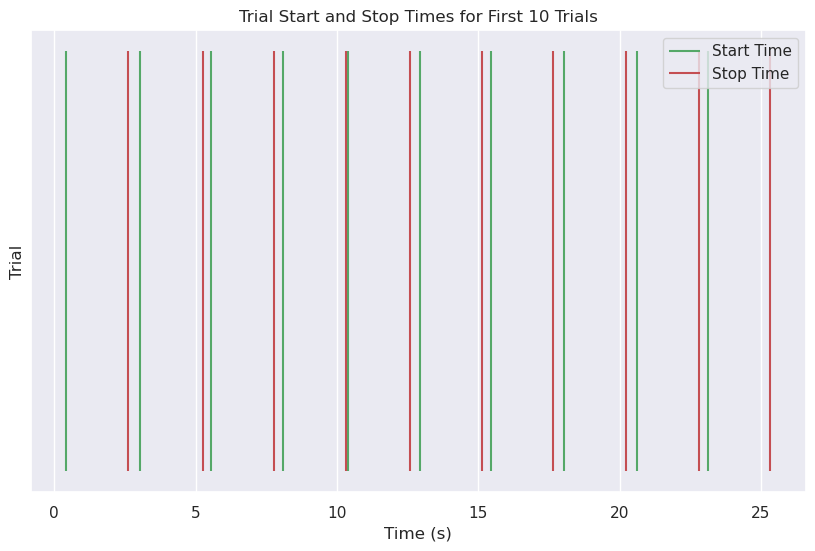

In [42]:
trials_df = nwb.trials.to_dataframe().head(10)
start_times = trials_df['start_time']
stop_times = trials_df['stop_time']

# Plot trial start and stop times
plt.figure(figsize=(10, 6))
plt.vlines(start_times, ymin=0, ymax=1, color='g', label='Start Time')
plt.vlines(stop_times, ymin=0, ymax=1, color='r', label='Stop Time')
plt.xlabel('Time (s)')
plt.ylabel('Trial')
plt.title('Trial Start and Stop Times for First 10 Trials')
plt.legend()
plt.yticks([])
plt.show()

## Summary and Future Directions

This notebook demonstrated how to load and explore data from Dandiset 000945, including:
- Loading the Dandiset using the DANDI API.
- Accessing and exploring the available assets (NWB files).
- Loading metadata from a selected NWB file.
- Loading and visualizing electrophysiology data (spike times and cell type labels).
- Loading and visualizing trial information.

Possible future directions for analysis include:
- Performing more in-depth analysis of the electrophysiology data, such as spike sorting and analysis of firing rates.
- Investigating the relationship between the ultrasound stimulation and the neural activity.
- Comparing the neural activity across different PRFs and anesthesia conditions.
- Analyzing the data from other NWB files in the Dandiset.